# Данные примера

In [2]:
import retentioneering

In [3]:
data = retentioneering.datasets.load_simple_shop()


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35381 entries, 0 to 35380
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    35381 non-null  int64 
 1   event      35381 non-null  object
 2   timestamp  35381 non-null  object
dtypes: int64(1), object(2)
memory usage: 829.4+ KB


In [4]:
data.head()

,user_id,event,timestamp
0,219483890,catalog,2019-11-01 17:59:13.273932
1,219483890,product1,2019-11-01 17:59:28.459271
2,219483890,cart,2019-11-01 17:59:29.502214
3,219483890,catalog,2019-11-01 17:59:32.557029
4,964964743,catalog,2019-11-01 21:38:19.283663


In [5]:
# update config to pass columns names:
retentioneering.config.update({
    'user_col': 'user_id',
    'event_col':'event',
    'event_time_col':'timestamp',
})

In [6]:
data.rete.plot_graph(norm_type='full',
                     weight_col='user_id',
                     thresh=0.06,
                     targets = {'payment_done':'green',
                                'lost':'red'})

'experiments/graph_2022-09-28 15_47_40_065306.html'

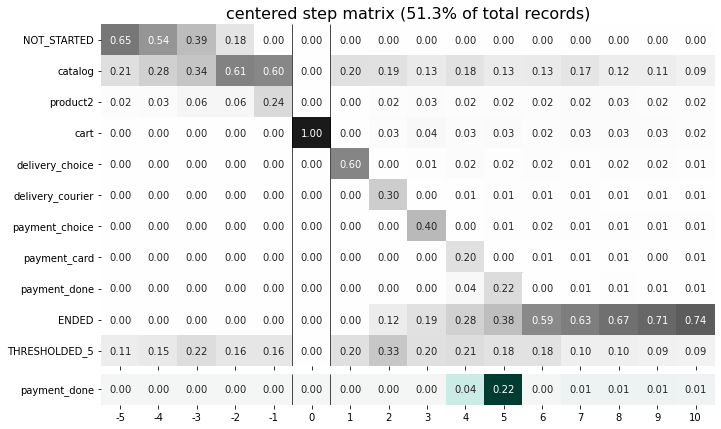

In [7]:
data.rete.step_matrix(max_steps=16,
                      thresh = 0.2,
                      centered={'event':'cart',
                                'left_gap':5,
                                'occurrence':1},
                      targets=['payment_done']);